In [1]:
#!pip install nltk
#!pip install autocorrect
#!pip install scikit-learn

In [2]:
!pip install NLTK

In [3]:
!pip install stopwords

In [4]:
!pip install tokenize 

ERROR: Could not find a version that satisfies the requirement tokenize
ERROR: No matching distribution found for tokenize


In [5]:
!pip install wordcloud

In [6]:
!pip install tqdm

In [7]:
!pip install scikit-learn

In [8]:
!pip install tqdm

# for Preprocessing NLP Data

    removing non alphabatic characters
    lowering the format
    tokeninzation
    remove stop words
    steming / lemitization
    spell correction

In [9]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from autocorrect import Speller
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re
stemmer=PorterStemmer()

In [10]:
data = pd.read_csv("C:/Users/Abhishek kumar/Downloads/Spam-Classifier-using-naive-bayes-main/Spam-Classifier-using-naive-bayes-main/spam.csv")

In [11]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [13]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [15]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

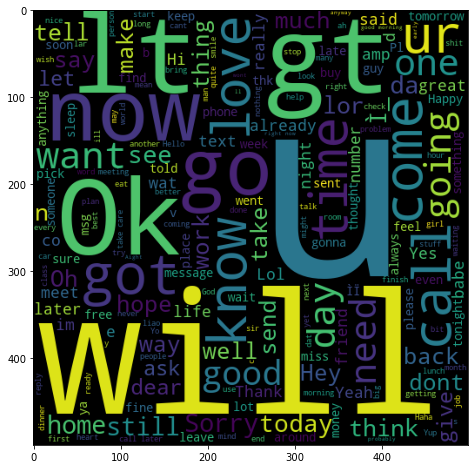

In [16]:
spam_words = ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# LETS VISUALIZE HAM WORDS

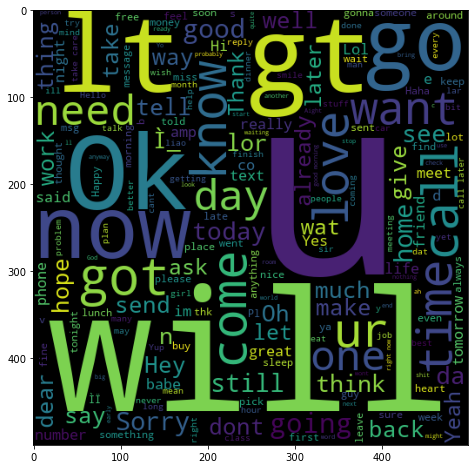

In [17]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [18]:
data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
data.shape

(5572, 2)

In [20]:
>>> import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [03:58<00:00, 23.35it/s]


In [23]:
lines

'rofl  its true to its name'

In [24]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [25]:
 processed_lines

['roll', 'true', 'name']

In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [27]:
final_lines

'roll true name'

In [28]:
len(new_data)

5572

In [29]:
Y=data['labels']
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object

In [30]:
Y.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

# splitting the data into training and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [32]:
X_train

['good more plz call sir',
 'not u dinner w us',
 'free entry weekly comp send word enter c www textcomp com just care',
 'oh k k take test',
 'hey gal anyone u go e drive center tmr',
 'raj pl favour pl convey birthday wish nima pl today birthday',
 'good afternoon starship bottom grave yet ach fuck sip cappuccino miss babe teas kiss',
 'life face choice toss coin below settle question coin air u know heart hope gun',
 'hope thing went well doctor remind still need go u c little thing left long',
 'pleas call amanda regard renew upgrade current mobil handset free charg offer end today tel subject c',
 'ok ill send lt denim gt ok',
 'congratul ur award either cd gift voucher free entry weekly draw txt music tnc www dew com win ppm age',
 'update ma offer latest motorola sonyericsson nokia free bluetooth double min txt orange call mobileupd call output f q',
 'k still love',
 'watch sure move pm vijay move pokkiri',
 'hope enjoy new content text stop unsubscrib help p provide tone co uk

In [37]:
len(X_train)

4179

In [33]:
 X_test

['hey rite u put even math',
 'nd time tri contact u u pound prize claim east call p per min bt nation rate',
 'final came fix cell',
 'hello madam',
 'short cute good person',
 'oh right ok make sure load work day got really nasty cough today doi n shot really help',
 'hhahhaahahah roll wtf nig leonardo room some',
 'carlo take sweet time usual let know parti done want smoke tell haul ass',
 'u come fuer home',
 'free tone hope enjoy new content text stop unsubscrib help p provide tone co uk',
 'right blah see later',
 'respect since talk boston person statement lol would chang realize said nyc say boston',
 'yeah sure give couple minut track wallet',
 'messi pl favor pl convey birthday wish nima pl dot forget today birthday shima',
 'gun ming dear nice day',
 'simply arithmetic percentage',
 'go got exit karaoke type active plan debate whether play football eve feel lazy though',
 'tell u headache want use hour sick time',
 'home n read',
 'still work time also tri ad zero save check

In [42]:
len(X_test)

1393

In [34]:
Y_train

1331     ham
4377     ham
1228    spam
2227     ham
1495     ham
        ... 
1353     ham
1823     ham
3333     ham
4774     ham
4720     ham
Name: labels, Length: 4179, dtype: object

In [40]:
len(Y_train)

4179

In [35]:
Y_test

4095     ham
3187    spam
4621     ham
2608     ham
3881     ham
        ... 
4670     ham
2684     ham
5449    spam
4861    spam
5027     ham
Name: labels, Length: 1393, dtype: object

In [41]:
len(Y_test)

1393

# Vectorization using Bag of Words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [44]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [45]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
Y_train

1331     ham
4377     ham
1228    spam
2227     ham
1495     ham
        ... 
1353     ham
1823     ham
3333     ham
4774     ham
4720     ham
Name: labels, Length: 4179, dtype: object

In [48]:
Y_test

4095     ham
3187    spam
4621     ham
2608     ham
3881     ham
        ... 
4670     ham
2684     ham
5449    spam
4861    spam
5027     ham
Name: labels, Length: 1393, dtype: object

# Lets train our Model - Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [50]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [55]:
model

GaussianNB()

In [51]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [62]:
Y_pred=model.predict(X_test_vect)

In [63]:
Y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'spam', 'spam'], dtype='<U4')

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
accuracy_score(Y_test,Y_pred) *100

86.50394831299354

In [66]:
confusion_matrix(Y_test,Y_pred)

array([[1053,  163],
       [  25,  152]], dtype=int64)